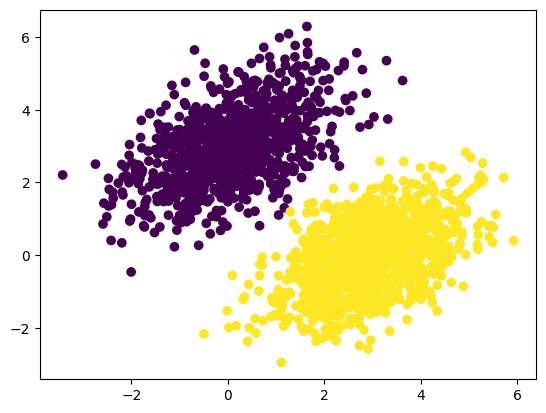

Epoch 1/40
63/63 [==============================] - 0s 864us/step - loss: 0.0858
Epoch 2/40
63/63 [==============================] - 0s 947us/step - loss: 0.0195
Epoch 3/40
63/63 [==============================] - 0s 807us/step - loss: 0.0129
Epoch 4/40
63/63 [==============================] - 0s 809us/step - loss: 0.0101
Epoch 5/40
63/63 [==============================] - 0s 931us/step - loss: 0.0085
Epoch 6/40
63/63 [==============================] - 0s 900us/step - loss: 0.0075
Epoch 7/40
63/63 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 8/40
63/63 [==============================] - 0s 806us/step - loss: 0.0061
Epoch 9/40
63/63 [==============================] - 0s 787us/step - loss: 0.0057
Epoch 10/40
63/63 [==============================] - 0s 758us/step - loss: 0.0053
Epoch 11/40
63/63 [==============================] - 0s 918us/step - loss: 0.0050
Epoch 12/40
63/63 [==============================] - 0s 943us/step - loss: 0.0047
Epoch 13/40
63/63 [========

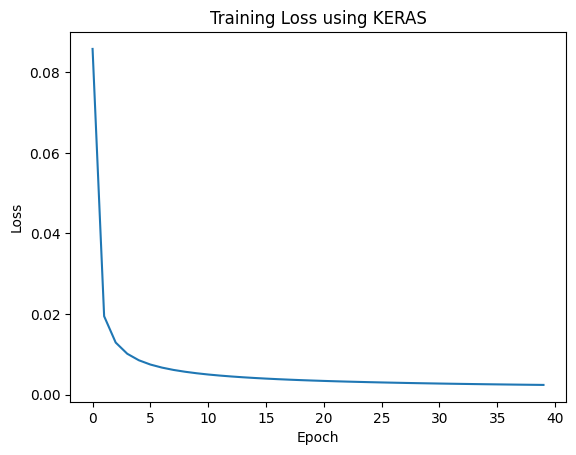

63/63 [==============================] - 0s 1ms/step


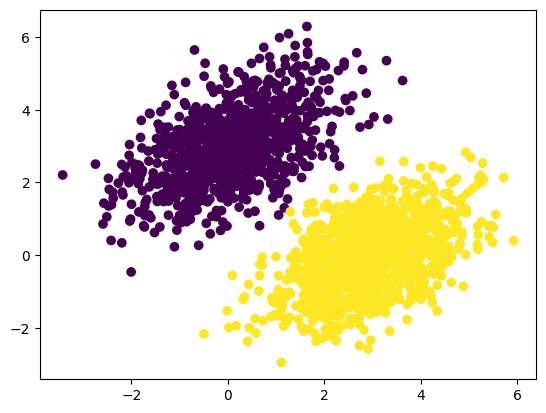

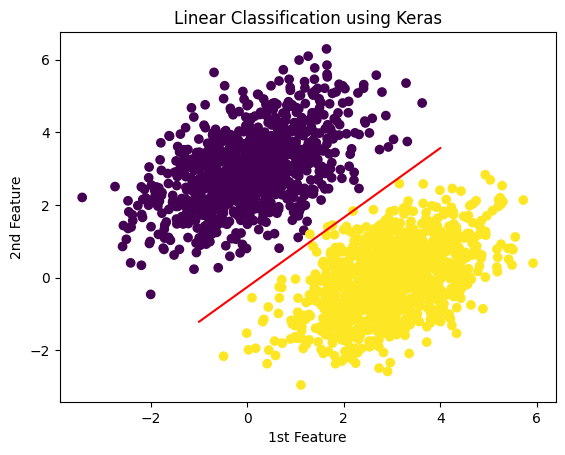

In [ ]:
## ANNISA RACHMAN - 2006569963
## No 1b - Linear Regression Using Keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Generating Two Classes
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generating Targets
targets = np.vstack((
    np.zeros((num_samples_per_class,1), dtype="float32"),
    np.ones((num_samples_per_class,1), dtype="float32")))

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()


# Define the Keras model
input_dim = inputs.shape[1]
output_dim = 1

model = keras.Sequential([
    keras.layers.Dense(output_dim, input_shape=(input_dim,), activation='sigmoid')
])

# Compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='mean_squared_error')

# Train the model
history = model.fit(inputs, targets, epochs=40, verbose=1)

# Plotting the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss using KERAS')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# The Training Result
predictions = model.predict(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

# Creating Visualized Model
weights = model.layers[0].get_weights()
W = weights[0]
b = weights[1]

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x,y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)

plt.title("Linear Classification using Keras")
plt.xlabel("1st Feature")
plt.ylabel("2nd Feature")

plt.show()